In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data = pd.read_csv('datingTestSet2.txt',sep = '\t',header = None)
X = np.array(data.iloc[:,:-1]) 
y = np.array(data.iloc[:,-1])

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
class KNN:
    def __init__(self):
        pass
    def train(self,X_train,y_train):
        #读取训练集
        self.X_train = np.array(X_train) 
        self.y_train = np.array(y_train)
    def predict(self,X_test):
        (m,d) = np.shape(X_test) #测试集的数量和特征数
        y_pred = np.zeros((m)) #将预测的标签初始化为0
        for i in range(m):    
            distance = np.sum(np.abs(self.Xtrain - X_test[i,:]),axis = 1) #求距离的绝对之和
            min_index = np.argmin(distance) #找到最近点的索引
            y_pred[i] = self.y_train[min_index] #将最近点的分类给新数据标记
        return y_pred

In [9]:
from collections import  Counter
class KNN:
    def __init__(self,k=1,metric ='euclidean'): #默认距离算法为欧式距离，默认最近邻
        self.metric = metric
        self.k = k
    def train(self,X_train,y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
    def predict(self,x_test):
        (m,d) = np.shape(x)#测试集的数量和特征数
        y_pred = np.zeros((m))#将预测的标签初始化为0
        #============================= show me your code =======================        
        for i in range(m):    
            distance = np.sum(np.sqrt(np.power(self.X_train - X_test[i,:], 2)),axis = 1) #求距离的绝对之和
            indices = np.argsort(distance)
            counts = Counter(self.y_train[indices[:self.k]])
            y_pred[i] = counts.most_common()[0][0] #将最近点的分类给新数据标记
        #============================= show me your code =======================
        return y_pred

In [14]:
from collections import  Counter
class KNN:
    def __init__(self,k,metric ='euclidean'):
        self.metric = metric
        self.k = k
    def train(self,X,y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
    def predict(self,x_test):
        x = np.array(x_test)
        (m,d) = np.shape(x)
        ypred = np.zeros((m))
        #============================= show me your code =======================        
        for i in range(m):    
            distance = np.sum(np.sqrt(np.power(self.X_train - X_test[i,:], 2)),axis = 1) #求距离的绝对之和
            indices = np.argsort(distance)
            counts = Counter(self.y_train[indices[:self.k]])
            ypred[i] = counts.most_common()[0][0] #将最近点的分类给新数据标记
        
        #============================= show me your code =======================
        return ypred
    def score(self,ypred,ytest):
        return sum(ypred == ytest)/len(ytest)
    

In [11]:
#数据标准化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_ = ss.fit(X)
X_std =ss.transform(X)

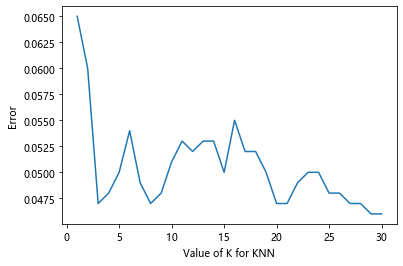

In [12]:
from sklearn.model_selection  import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 31)
k_error = []
#循环，取k=1到k=31，查看误差效果
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #cv参数决定数据集划分比例，这里是按照5:1划分训练集和测试集
    scores = cross_val_score(knn, X_std, y, cv=5, scoring='accuracy')
    k_error.append(1 - scores.mean())

#画图，x轴为k值，y值为误差值
plt.plot(k_range, k_error)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error')
plt.show()

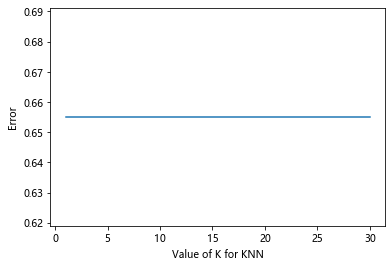

In [15]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=False) #将数据集分为互斥的5等份，用作测试
k_errors = [] #建立初始的误差列表
for k in k_range:
    knn = KNN(k=k)
    scores = []
    for train , test in kf.split(X_std,y):
        knn.train(X_std[train],y[train])
        ypred = knn.predict(X_std[test])
        score = knn.score(ypred,y[test])
        scores.append(1-score)
    k_errors.append(np.mean(scores))

plt.plot(k_range, k_errors)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error')
plt.show()

In [17]:
# 定义类别对应的标签
resultList = ['不喜欢的人', '魅力一般的人', '极具魅力的人']
#输入数据
ffMiles = float(input("每年获得的飞行常客里程数?"))
percentTats = float(input("玩视频游戏所耗时间百分比?"))
iceCream = float(input("每周消费的冰淇淋公升数?"))
inArr = np.array([[ffMiles, percentTats, iceCream]])
#用之前的fit的标准化数据来转换数据
x_new = ss.transform(inArr)
#预测数据
ypred = knn.predict(x_new)
print("这个人属于: ", resultList[int(ypred) - 1])

这个人属于:  不喜欢的人
